In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def MNIST_data(file_name,data_size):
    if file_name == 'train-images-idx3-ubyte.gz' or file_name == 't10k-images-idx3-ubyte.gz' :
        import gzip
        f = gzip.open(file_name, 'r')
        
        image_size = 28 * 28
        f.read(16)
        buf = f.read()
        data = np.frombuffer(buf, dtype = 'uint8').astype('f')
        data = data.reshape(data_size,784)
        return data
    elif file_name == 'train-labels-idx1-ubyte.gz' or file_name == 't10k-labels-idx1-ubyte.gz' :
        import gzip
        f = gzip.open(file_name, 'r')
        
        label_size = 1
        
        f.read(8)
        buf = f.read()
        data = np.frombuffer(buf, dtype = 'uint8').astype('f')
        data = data.reshape(data_size,1)
        return data
    else:
        print('Enter correct file name or data size')

In [3]:
X_train = MNIST_data('train-images-idx3-ubyte.gz',60000)
X_train.shape

(60000, 784)

In [4]:
y_train = MNIST_data('train-labels-idx1-ubyte.gz',60000).flatten()
y_train.shape

(60000,)

In [5]:
X_test = MNIST_data('t10k-images-idx3-ubyte.gz',10000)
X_test.shape

(10000, 784)

In [6]:
y_test = MNIST_data('t10k-labels-idx1-ubyte.gz',10000).flatten()
y_test.shape

(10000,)

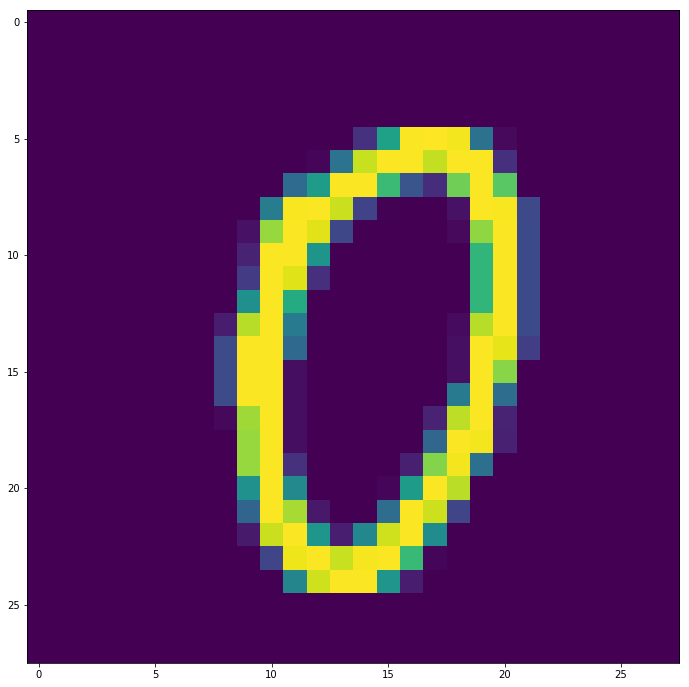

In [7]:
plt.figure(figsize=(15,12))
plt.imshow(X_train[1000].reshape(28,28));

In [8]:
y_train[1000]

0.0

# Shuffling of data
**Tips**: Typically we shuffle the training set. This ensures the training set is randomised and your data distribution is consistent. However, shuffling is a bad idea for time series data.

In [9]:
shuffle_index = np.random.permutation(60000)

In [10]:
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

alternative to above shuffuling is from sklearn import shufflesplit

# training Binary classifier 
only two posibilities for simple understanding

In [11]:
y_train_0 = (y_train == 0)

In [12]:
y_train_0

array([False, False, False, ..., False, False, False])

In [13]:
y_test_0 = (y_test == 0)

# Precision and recall score

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score

In [15]:
clf = SGDClassifier(max_iter = 500, tol = 1e-3 )

In [16]:
from sklearn.model_selection import cross_val_predict

In [17]:
y_pred_0 = cross_val_predict(clf, X_train, y_train_0, cv = 3)

# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_train_0,y_pred_0)

array([[53505,   572],
       [  308,  5615]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
precision_score(y_train_0, y_pred_0)

0.9075480846937126

In [22]:
recall_score(y_train_0, y_pred_0)

0.9479993246665541

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_train_0, y_pred_0)

0.9273327828241124

# Precision / Recall Trade Off

In [25]:
clf = SGDClassifier()
clf.fit(X_train, y_train_0)
y_score = clf.decision_function(X_train[1000].reshape(1,-1))

C:\Users\Coffe King\Anaconda3\envs\iris_2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [26]:
y_score

array([-407974.41298438])

# Calculate y_score for Precision recall curve

In [27]:
y_score = cross_val_predict(clf, X_train, y_train_0, cv = 3, method= 'decision_function')

C:\Users\Coffe King\Anaconda3\envs\iris_2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Coffe King\Anaconda3\envs\iris_2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Coffe King\Anaconda3\envs\iris_2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19

In [28]:
y_score.shape

(60000,)

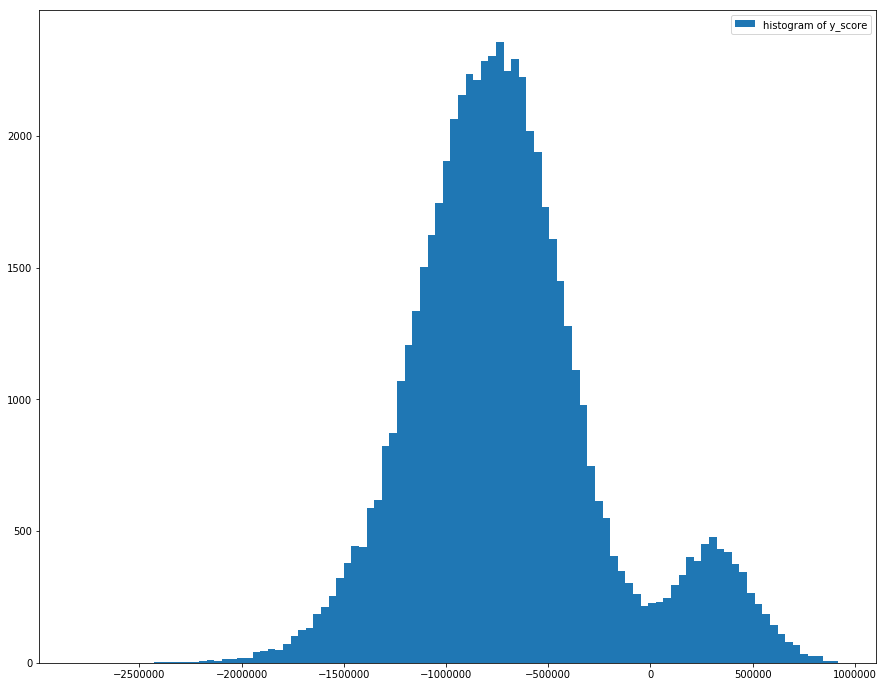

In [29]:
plt.figure(figsize=(15,12))
plt.hist(y_score,bins=100, label="histogram of y_score");
plt.legend();

# Precision Recall curve

In [30]:
from sklearn.metrics import precision_recall_curve

In [31]:
Precision, Recall, threshold = precision_recall_curve(y_train_0, y_score)

In [32]:
Precision.shape

(55154,)

In [33]:
threshold.shape

(55153,)

In [34]:
Recall.shape

(55154,)

In [37]:
def Pre_Recall_threshold_cruve(Precision, Recall, threshold):
    plt.plot(threshold, Precision[:-1], '--', color = 'red', label = 'Precision')
    plt.plot(threshold, Recall[:-1], '--', color = 'orange', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim(-.5,1.5)

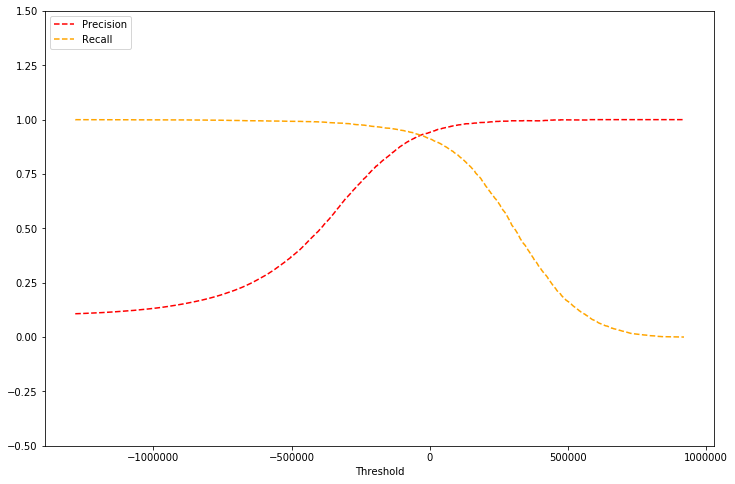

In [38]:
plt.figure(figsize=(12,8))
Pre_Recall_threshold_cruve(Precision, Recall, threshold)
plt.show();

In [39]:
len(Precision)

55154

In [40]:
len(threshold)

55153

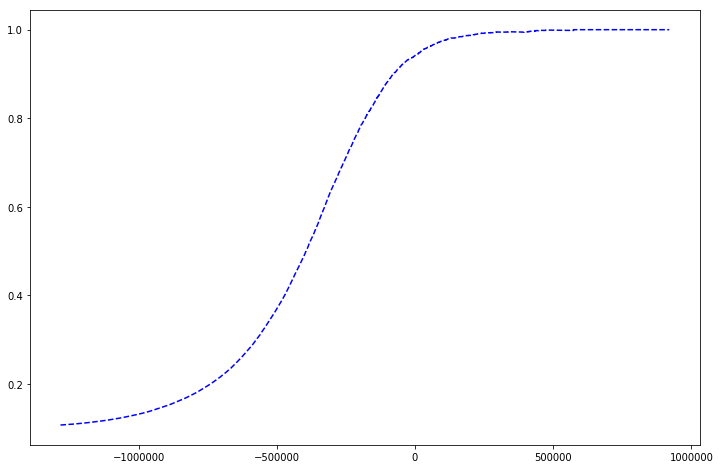

In [41]:
plt.figure(figsize=(12,8))
plt.plot(threshold, Precision[1:], 'b--');

In [44]:
index = len(Precision[Precision < 0.9])
index

48933

In [45]:
threshold[index]

-77803.2109832666

In [57]:
y_train_pre_90 = y_score > threshold[index]
y_train_pre_90

array([False, False, False, ..., False, False, False])

In [59]:
precision_score( y_train_0, y_train_pre_90)

0.9001447178002895

In [60]:
recall_score(y_train_0, y_train_pre_90)

0.9451291575215263

# Setting very high precisions

In [61]:
index = len(Precision[Precision < .99])

In [75]:
Precision < .99

array([ True,  True,  True, ..., False, False, False])

In [62]:
index

51215

In [63]:
index = len(Precision) - len(Precision[Precision > .99])

In [64]:
index

51215

In [67]:
Precision.shape

(55154,)

In [68]:
Recall.shape 

(55154,)

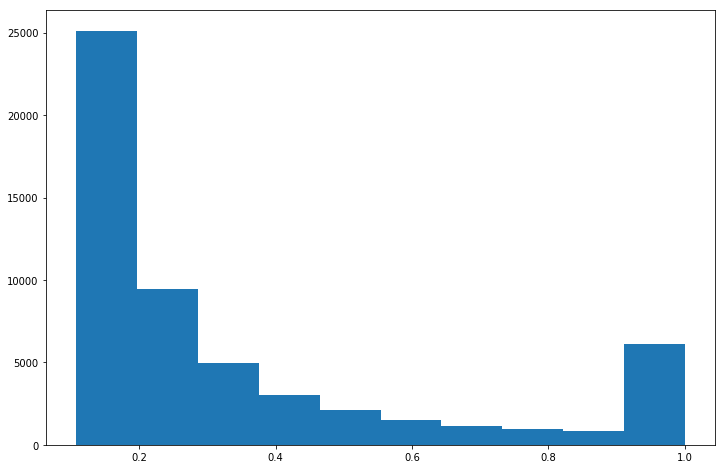

In [70]:
plt.figure(figsize=(12,8))
plt.hist(Precision);

In [71]:
y_train_pred_99 = y_score > threshold[index]

In [72]:
precision_score(y_train_0, y_train_pred_99)

0.9900939801879604

In [73]:
recall_score(y_train_0, y_train_pred_99)

0.6581124430187405

In [74]:
f1_score(y_train_0, y_train_pred_99)

0.7906693711967546

# Recall = 0.9

In [79]:
index = len(Recall[Recall > 0.9])

In [80]:
y_train_pre_rec_90 = y_score > threshold[index]

In [81]:
recall_score(y_train_0, y_train_pre_rec_90)

0.8998818166469694

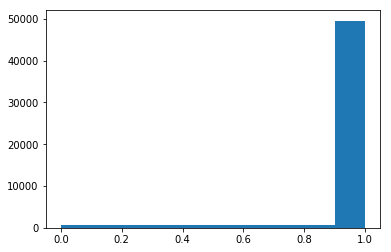

In [84]:
plt.figure()
plt.hist(Recall);